# EDLIF model

Jaras I, Harada T, Orchard ME, Maldonado PE, Vergara RC. Extending the integrate-and-fire model to account for metabolic dependencies. Eur J Neurosci. 2021 Aug;54(4):5249-5260. doi: 10.1111/ejn.15326. Epub 2021 Jul 16. PMID: 34109698.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import nest
import numpy as np
import os

from pynestml.frontend.pynestml_frontend import generate_nest_target

NEST_SIMULATOR_INSTALL_LOCATION = nest.ll_api.sli_func("statusdict/prefix ::")


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: Mar 23 2022 13:33:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
generate_nest_target(input_path="edlif_psc.nestml",
                     target_path="/tmp/nestml-component",
                     logging_level="WARNING",
                     codegen_opts={"nest_path": NEST_SIMULATOR_INSTALL_LOCATION})

[6,edlif_psc, WARNING, [29:13;29:22]]: Non-matching unit types at mV / ms +/- pA / pF! Implicitly replaced by mV / ms +/- 1.0 * pA / pF.
[7,edlif_psc, WARNING, [78:12;78:12]]: Implicit casting from (compatible) type 'mV' to 'integer'.


-- The CXX compiler identification is GNU 10.3.0
-- Check for working CXX compiler: /home/wis/anaconda3/envs/wnestml/bin/c++
-- Check for working CXX compiler: /home/wis/anaconda3/envs/wnestml/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done

-------------------------------------------------------
nestmlmodule Configuration Summary
-------------------------------------------------------

C++ compiler         : /home/wis/anaconda3/envs/wnestml/bin/c++
Build static libs    : OFF
C++ compiler flags   : -fvisibility-inlines-hidden -std=c++17 -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fn

In [3]:
nest.Install("nestmlmodule")


Apr 13 14:23:40 Install [Info]: 
    loaded module nestmlmodule


/tmp/ipykernel_49759/424194641.py:30: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


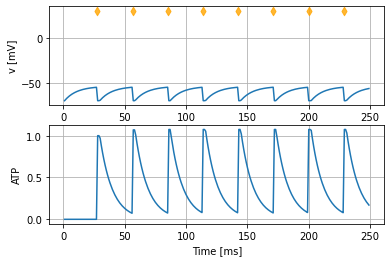

In [4]:
nest.set_verbosity("M_WARNING")
nest.ResetKernel()

neuron = nest.Create("edlif_psc")
voltmeter = nest.Create("voltmeter")

voltmeter.set({"record_from": ["V_abs", "V_m", "ATP"]})
nest.Connect(voltmeter, neuron)

cgs = nest.Create('dc_generator')
cgs.set({"amplitude": 1.})
nest.Connect(cgs, neuron)

sr = nest.Create("spike_recorder")
nest.Connect(neuron, sr)

nest.Simulate(250.)

spike_times = nest.GetStatus(sr, keys='events')[0]['times']

fig, ax = plt.subplots(nrows=2)
ax[0].plot(voltmeter.get("events")["times"], voltmeter.get("events")["V_m"])
ax[1].plot(voltmeter.get("events")["times"], voltmeter.get("events")["ATP"])
ax[0].scatter(spike_times, 30 * np.ones_like(spike_times), marker="d", c="orange", alpha=.8, zorder=99)
for _ax in ax:
    _ax.grid(True)
ax[0].set_ylabel("v [mV]")
ax[1].set_ylabel("ATP")
ax[-1].set_xlabel("Time [ms]")
fig.show()